In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
import plotnine as p

ModuleNotFoundError: No module named 'causalgraphicalmodels'

In [ ]:
from causalgraphicalmodels import CausalGraphicalModel
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
#import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import pyreadr

# Reporte 7:

In [ ]:
# María Fernanda Carrillo

## Parte 1: Reporte

La pregunta relacionada con el ‘paper’ de Chetty, Hendren y Katz refiere principalmente al impacto a largo plazo que tuvieron las familias que se mudaron a mejores vecindarios, ello mediante el análisis y estudio de los sujetos participantes del experimento MTO (Moving to Opportunity). Particularmente impulsado por la nueva evidencia que se presenta en tanto los sujetos participantes, los niños menores a 13 años, sobre todo, crecieron y las diferencias entre grupos, ahora siendo adultos, son más significativas y visibles. Y que los ‘outcomes’ son más valiosos no solo para las familias en el largo plazo, particularmente para estos niños, sino que el proyecto resulta en un mayor retorno de dinero manifestado con los impuestos que de adultos pagan. 

Fundamentalmente la principal ventaja que presenta es el motivo mismo del estudio, el enfoque en los que fueron niños y cómo es que, a largo plazo, la relocalización que tuvieron en su infancia impactó en su edad adulta. Impacta en su salario, en una mayor probabilidad de asistir a la universidad o de convertirse en padres solteros; de esa manera también es que impacta en las futuras generaciones. Asimismo, es que el análisis presenta una multiplicidad de variables a tener en cuenta para poder comprobar sus hipótesis con mayor efectividad, comparándolas además con los resultados previamente obtenidos del estudio realizado anteriormente. 

La desventaja del estudio en sí no obstante es que los hallazgos son consistentes con este modelo de efectos expuestos, es que el diseño del experimento como tal (MTO) no puede ser utilizado para establecer efectivamente si la exposición en la infancia a un mejor ambiente tiene un efecto causal en los resultados a largo plazo, como menciona el autor. Ello en tanto las edades en las cuales los infantes se mudan se correlacionan perfectamente con su tiempo de exposición a un vecindario menos pobre. Así, no se pueden distinguir las diferencias en los efectos de la disrupción, tanto si se dieron por la edad de la mudanza o si esta se acompaño con el efecto de exposición. Sin embargo, es que esta diferencia no impide que los resultados sean adecuados en concluir que el dar esta subsidiariedad que permite la mudanza produce un mayor beneficio para los niños más jóvenes. 
Este artículo avanza en la investigación en refutar teorías que avalaban que este proyecto traía beneficios irrisorios. Por el contrario, el beneficio resultó producente y efectivo, mas los efectos de la mudanza subsidiada llegaron, pero a un largo plazo, que fue cuando los infantes, que previamente no habían sido considerados en los resultados por su corta edad, al llegar a la adultez, consiguieron un mayor estilo y calidad de vida a comparación de sus contrapartes que quedaron en esos vecindarios. Que este proyecto, prueba en definitiva que estas iniciativas son efectivas y no solo son beneficiosas para los sujetos en cuestión, sino que tras unas cuantas décadas es que la inversión es retroactiva y hace que la ciudadanía se encuentre más capacitada y en mejores condiciones, igualmente. 

## Parte 2: Código

In [ ]:
# Trabajo con Angela Rodriguez

####  1. Ploteo de Histogramas
Deben plotear la distribución de las notas para los tres grupos (face-to-face, blended format y online lessons) de manera separada. 

In [3]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
data.head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [4]:
# creado una columna extra para clasificar
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

In [5]:
pd.get_dummies(data_2, columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


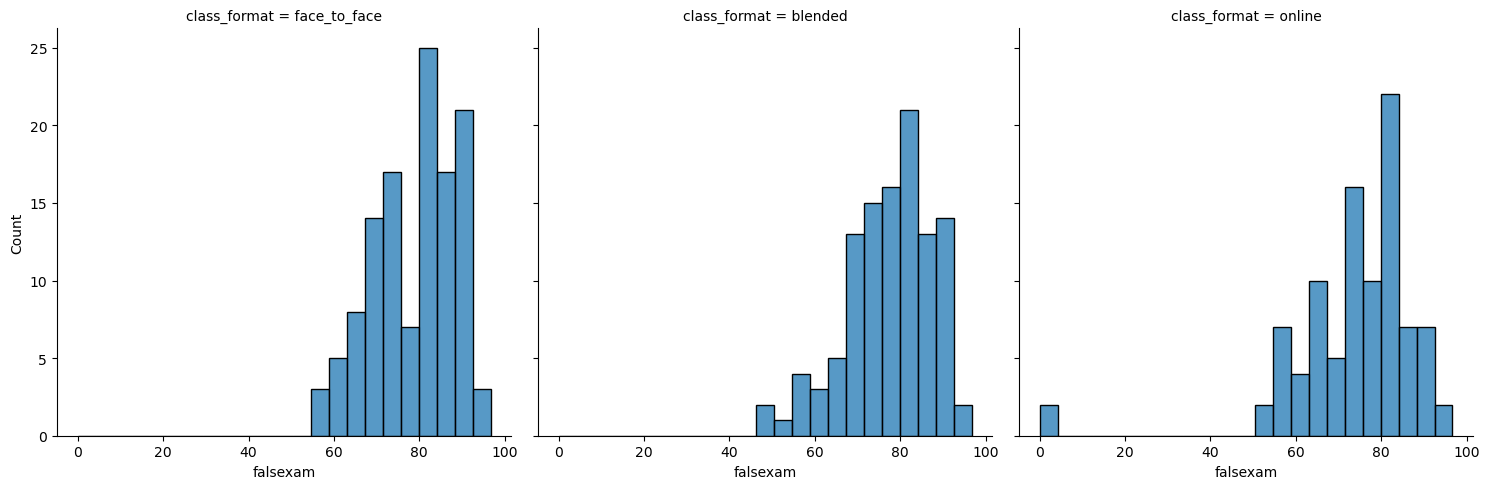

In [6]:
sns.displot(data=data_2, x="falsexam", col="class_format")

## 2. Estimador de diferencia de medias.
En base a los grupos face-to-face y online lessons se halla la diferencia de promedios de notas de ambos grupos. Para ello se sigue los siguientes pasos:

In [8]:
d_promedio = data_2[['class_format','falsexam']]
d_promedio.head(10)

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
2,blended,83.37000
3,blended,90.01994
4,online,83.30000
5,online,88.34996
6,blended,78.40000
7,face_to_face,90.00000
8,face_to_face,88.31000
9,online,73.37000


In [9]:
grupos=["face_to_face", "online"] #
grupos

['face_to_face', 'online']

In [10]:
D_MEAN = d_promedio[d_promedio['class_format'].isin(grupos)]
D_MEAN

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


In [11]:
D_MEAN.groupby(["class_format"]).mean()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


### 3. Estimador de diferencia de medias mediante regresión lineal